# Natural Language Processing
## _Sentiment analysis of TikTok comments regarding air quality in Delhi_
### Tom Verstraten - Group 1

This notebook shows all the code used to perform a sentiment analysis on TikTok comments on videos regarding the poor air quality in Delhi. The CSV files used for this script can be found in the same directory as this notebook in the GitLab repository. The code in this file has the path to the CSV files written for my personal laptop, so be sure to change those lines if needed.

The final results of this script are:
  
  - A CSV file showing the sentiment of each comment
  - A barplot showing the overall sentiment of all comments (ranging from 1 star (=very negative) to 5 stars (=very positive)
  - A word cloud showing the most frequent keywords in the comments

**Step 1:** Import all necessary libraries

In [35]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from tabulate import tabulate
from IPython.display import display, HTML

**Step 2:** Download NLTK resources for tokenization. 

'Punkt' is later used for the nltk.word_tokenize() function in step 9 (source: https://www.nltk.org/_modules/nltk/tokenize/punkt.html#PunktLanguageVars.word_tokenize). It makes sure that the comments are tokenized into individual words instead of full sentences.

'Stopwords' is used for the stopwords.words() function, also in step 9 (source: https://www.nltk.org/search.html?q=stopwords). It makes sure that stopwords such as 'and' or 'the' are removed to make the results more relevant.

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Step 3:** Load the sentiment analysis pipeline (a pre-trained sentiment analysis model using the transformers library). The following model is used: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [5]:
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

**Step 4:** Define analyze_sentiment function which analyzes the sentiment of a given comment and returns the sentiment label and score

In [6]:
def analyze_sentiment(comment):
    result = sentiment_pipeline(comment)
    return result[0]['label'], result[0]['score']

**Step 5:** Read the TikTok comments from a CSV file in Google Drive into a Pandas DataFrame

In [11]:
csv_file_path = 'C:\\Users\\tomve\\Downloads\\Video1_comments.csv'  # Replace the path to work on your computer
df = pd.read_csv(csv_file_path)

**Step 6:** Apply the analyze_sentiment function to each comment in the DataFrame (this adds sentiment labels and scores to the DataFrame)

In [12]:
df['Sentiment'], df['Score'] = zip(*df['comment'].apply(analyze_sentiment).tolist())

**Step 7:** Save the updated DataFrame with sentiment information to a new CSV file

In [16]:
output_csv_path = 'Video1_sentiment.csv'  # Replace with the desired output path
df.to_csv(output_csv_path, index=False)
print(f"Results saved to: {output_csv_path}")

Results saved to: Video1_sentiment.csv


**Step 8:** Display the statistics for sentiment labels in a table

In [17]:
statistics_labels = df['Sentiment'].describe().reset_index()
sentiment_statistics_table = tabulate(statistics_labels, headers='keys', tablefmt='html', showindex=False)
display(HTML(sentiment_statistics_table))

**Step 9:** Tokenize all comments, convert them to lowercase, and remove stopwords

In [18]:
stop_words = set(stopwords.words('english'))
all_comments = ' '.join(df['comment'])
tokens = nltk.word_tokenize(all_comments.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

**Step 10:** Plot a bar chart showing the distribution of sentiment labels

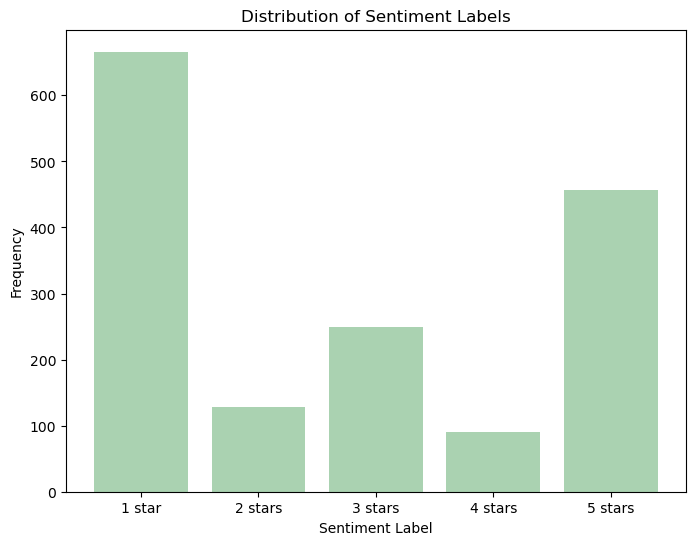

In [21]:
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
ax1.bar(df['Sentiment'].value_counts().sort_index().index, df['Sentiment'].value_counts().sort_index(), color='#86bf91', alpha=0.7)
ax1.set_title('Distribution of Sentiment Labels', fontsize=12)
ax1.set_xlabel('Sentiment Label', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_xticks(df['Sentiment'].value_counts().sort_index().index)
ax1.tick_params(axis='both', labelsize=10)
plt.show()

**Step 11:** Count the frequency of each token

In [23]:
word_counter = Counter(filtered_tokens)

**Step 12:** Generate a word cloud based on the most frequent words in the TikTok comments

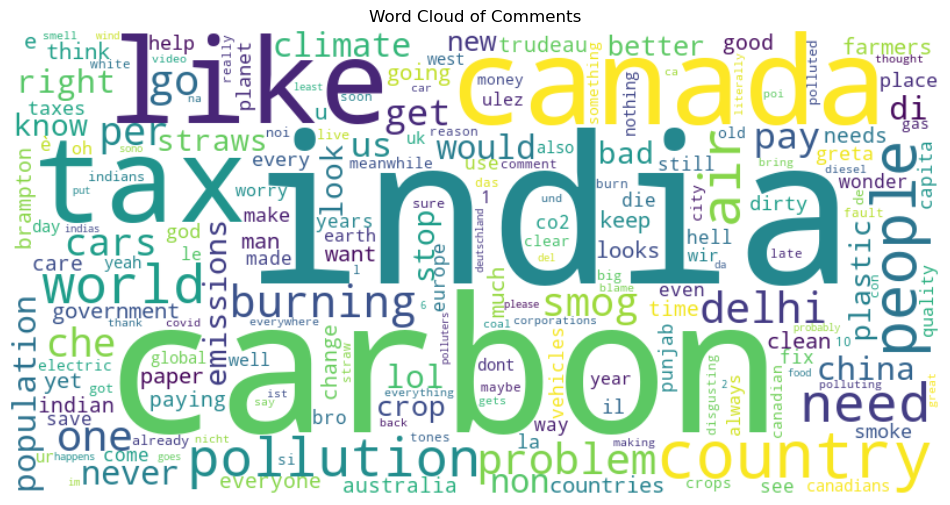

In [24]:
plt.figure(figsize=(12, 8))
ax2 = plt.gca()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counter)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Word Cloud of Comments', fontsize=12)
plt.show()